In [24]:
# to download osm dataimport osmnx as ox
import osmnx as ox

# to manipulate and visualize spatial dataimport geopandas as gpd
import geopandas as gpd

# to provide basemaps import contextily as ctx
import contextily as ctx

# to plot things with plotlyimport plotly.express as px
import plotly.express as px

# we import this so we can process this csv file
import pandas as pd

In [25]:
landlords = gpd.read_file('../data/South LA Neighborhood Data/South_Central_Landlords.csv')

In [26]:
# how many columns/rows does it have?
landlords.shape

(325, 9)

In [27]:
#what does the data look like?

landlords.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

   1st Owner's First Name 2nd Owners Name Number of Units geometry  
0  Sola Impact Fund Ii Lp     SOLA Impact               6     None  
1  Sola Impact Fund Ii Lp     SOLA Impact               6     None  
2     Sola Impact Fund Lp     SOLA Impact              15     None  
3  1411 E 53rd Street Llc   Navid Yadegar               5     None  
4  1411 E 53rd Street Llc   Navid Yadegar               5     None

In [28]:
# check to see how many columns have all null values
landlords.columns[landlords.isna().all()].tolist()

['geometry']

In [35]:
# we don't need the geometry column so let's drop that and make sure the code worked
columns_to_drop = ['geometry']

landlords_trim = landlords.drop(columns_to_drop,axis=1)
landlords_trim.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

   1st Owner's First Name 2nd Owners Name Number of Units  
0  Sola Impact Fund Ii Lp     SOLA Impact               6  
1  Sola Impact Fund Ii Lp     SOLA Impact               6  
2     Sola Impact Fund Lp     SOLA Impact              15  
3  1411 E 53rd Street Llc   Navid Yadegar               5  
4  1411 E 53rd Street Llc   Navid Yadegar               5

In [74]:
# let's start mapping; this is a pandas dataframe and we want to convert it to a geodataframe; we'll need to define which columns will be your lat and long; we are using the WGS84 geographic coordinate system

landlords_trim = gpd.GeoDataFrame(landlords_trim, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(landlords_trim.Longitude, landlords_trim.Latitude))

In [75]:
# Now, we reproject it to a web mercator projection to allow contextily tiles to work as a base layer
# textily requires you to have data projected in web mercator form to create the map

landlords_trim = landlords_trim.to_crs(epsg=3857)

In [47]:
# now let's map it!

ax = landlords_trim.plot(figsize=(12,12),
                              column='1st Owner's First Name',
                              legend=True,
                              cmap='Set1',
                             markersize=60)

ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

SyntaxError: invalid syntax (<ipython-input-47-b1d7b0d07414>, line 4)

In [36]:
# oops! that didn't work; let's rename the columns in order to project the maps

columns = list(landlords_trim) 
columns

['Purchase Date',
 'Site Address',
 'Site Zip Code',
 'Longitude',
 'Latitude',
 "1st Owner's First Name",
 '2nd Owners Name',
 'Number of Units']

In [38]:
# now that we've listed them, let's rename them

landlords_trim.columns = ['Purchase Date',
 'Site Address',
 'Site Zip Code',
 'Longitude',
 'Latitude',
 "First Owners Name",
 '2nd Owners Name',
 'Number of Units']

In [39]:
# okay, let's make sure that worked

landlords_trim.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

        First Owners Name 2nd Owners Name Number of Units  
0  Sola Impact Fund Ii Lp     SOLA Impact               6  
1  Sola Impact Fund Ii Lp     SOLA Impact               6  
2     Sola Impact Fund Lp     SOLA Impact              15  
3  1411 E 53rd Street Llc   Navid Yadegar               5  
4  1411 E 53rd Street Llc   Navid Yadegar               5

In [48]:
# now we can start taking a look at the columns to understand any trends; let's look at how many LLC Landlords are in each zip code
px.bar(landlords,
       x='Site Zip Code',
       title='LLC Landlords by Zip Code in South LA'
      )

In [49]:
# this bar graph is really hard to see; plus, it's showing the zip codes as numbers rather than categories

# Create a figure from the Enviro LA data frame where the score is greater than 73.12 (the top 10)
fig = px.bar(landlords,
       x='Site Zip Code',
       title='LLC Landlords by Zip Code in South LA'
      )

# force the chart to show the census tract as a category <--- THIS IS THE MAGIC TRICK THAT MAKES IT WORK
fig.update_layout(xaxis=dict(type='category'))

fig.show()

In [ ]:
## it worked! now we can see that zip codes 90003, 90043, 90011, 90044, 90001, and 90037 have the most LLC landlords in this list

In [65]:
# perhaps it would look better if we visualized the data as a chart instead

# Now make a data frame that summarizes the number of LLC Landlords in each zip code
landlords_zipcodes = landlords_trim['Site Zip Code'].value_counts().reset_index()

# Adjust the column headers so the names match the values below
landlords_zipcodes.columns = ['Site Zip Code', 'Count']

# Show me the top 25
landlords_zipcodes.head(25)

Site Zip Code  Count
0          90003     39
1          90043     38
2          90011     32
3          90044     31
4          90001     23
5          90037     22
6          90302     13
7          90047     12
8          90062     11
9          90059      8
10         90008      8
11         90018      8
12         90002      8
13         90026      5
14         90006      4
15         90806      4
16         90301      4
17         90016      4
18         90061      4
19         90221      4
20         90303      3
21         90007      3
22         90017      3
23         90032      3
24         91406      2

In [71]:
# this confirms our previous analysis from the bar graph, but now we have a solid count of how many are in each zip code. great!

# let's now try mapping just the top 10 zip codes, which end up actually including 13 zip codes since the last 4 each have 8 LLC Landlords there

fig = px.bar(landlords_zipcodes.head(14),
            x='Site Zip Code', 
            y='Count', 
            hover_data=['Count'], 
            color='Count', 
            height=500,
            title='Top 13 Zip Codes with LLC Landlords in South LA'
            )

# force the chart to show the census tract as a category <--- THIS IS THE MAGIC TRICK THAT MAKES IT WORK
fig.update_layout(xaxis=dict(type='category'))

fig.show()

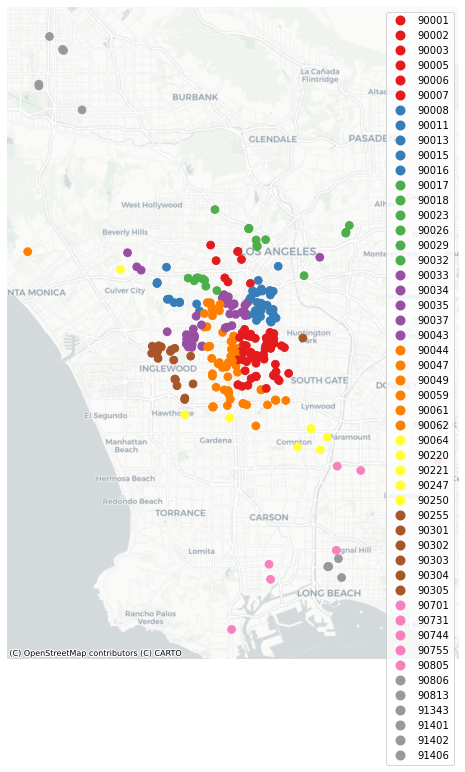

In [76]:
ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='Set1',
                             markersize=60)

ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)



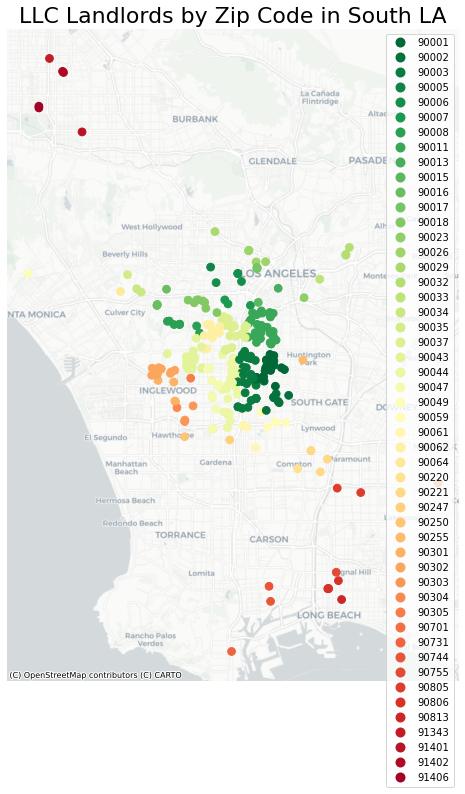

In [78]:
# that was cool, but let's try adding a title and messing around with the colors

ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='RdYlGn_r',
                             markersize=60)

ax.axis('off')
ax.set_title('LLC Landlords by Zip Code in South LA',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


In [ ]:
# need to fix the color
# trim to top 13 zips
# do interactive map

In [79]:
# let's make an interactive map now; Since we projected our data to web mercator, note that we have to project it back to WGS84 to work with plotly.

# reproject to WGS84
landlords_trim = landlords_trim.to_crs(epsg=4326)

In [80]:
landlords_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
# first, we need to get the center lat/long


#First, get the bounding box coordinates of the neighborhoods:
minx, miny, maxx, maxy = landlords_trim.geometry.total_bounds

In [82]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.2880035

In [83]:
# map it! 
# can also have another variable with point data on the top of the cloropleth map
fig = px.choropleth_mapbox(landlords_trim, 
                           geojson=.geometry, 
                           locations=landlords_trim.index, 
                           color='crime_count',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=landlords_trim.name,
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'neighborhoods' is not defined